# Data Exploration Projects with Python

Foreword:

When you find a data set in the wild and out in the open or the internet, you will likely understand the dataset by itself due to:

- There will be column names that you don't understand.
- Numerical Units aren't specified.
- Values such as item numbers, PO numbers or SKU numbers have an unfamiliar nomeclature.
- Some values are a calculation or dependent on other features and must match the inputs of other columns.
- Columns contain digit values that aren't numerical and should be classified as a catagorical such as social security numbers or employee ID numbers.

Always look, request or ask for an explanation file which can contain the above information. An explanation file would like something like this:

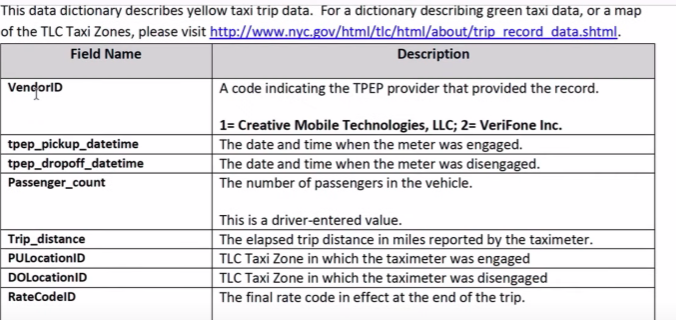

The goal of this notebook is to demonstrate the common functions/tools/revisions and ways of thinking when it comes to exploring the data. Most importantly, data exploring should be fun! You're creativity will help guide your exploration.

__IMPORTANT NOTE: The data set for 'EXAMPLE 1 - New York City Trees' can be downloaded at https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh__

## EXAMPLE 1 - New York City Trees

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
tree_census = pd.read_csv(r"2015_Street_Tree_Census_-_Tree_Data.csv") #Enter your path
tree_census.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


NOTE: There are so many columns that pandas doesn't display all of them (see the '...' symbol in columns).

Below will allow you to see all the columns

In [9]:
pd.set_option('display.max_columns', None)
tree_census

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


### FILTER THE DATA WITH ONLY RELAVENT INFORMATION

You know must know the the purpose of studying the dataset or overall business objective to help decide which information is important and which information can be discarded.

The goal in this example is to understand the overall health of trees in New York City.

Copy and pasting column names directly from `df.columns` makes it easier to delete names from coluns columns as it avoids errors in typos and/or incorrect format.

In [11]:
tree_census.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

Below columns were considered irrelavent:

['block_id', 'created_at', 'spc_common', 'spc_common', 'guards', 'user_type', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl']

In [13]:
tree_census_subset = tree_census[['tree_id','tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'steward',
       'sidewalk','problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_census_subset

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


### OBSERVE HOW MANY ROWS ARE NA

Note: Just because the values are na doesn't necessarily always mean it is wise to delete.

`df.isna().sum()`

In [15]:
tree_census_subset.isna().sum()

tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

We notice that 'health', 'spc_latin', 'steward', 'sidewalk', 'problems' contain a significant quanity of values that are na.

Let's see how that data set looks with those na values:

In [17]:
tree_census_subset[tree_census_subset['health'].isna()]

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


### UNDERSTAND THE TYPES OF DATA

`df.dtypes` - states which values are numerical or catagorical

NOTE: Notice that tree_id is classified as numerical since it contains digit values. However, it is an ID number and should be considered a catagorical variables.

In [22]:
tree_census_subset.dtypes

tree_id        int64
tree_dbh       int64
stump_diam     int64
curb_loc      object
status        object
health        object
spc_latin     object
steward       object
sidewalk      object
problems      object
root_stone    object
root_grate    object
root_other    object
trunk_wire    object
trnk_light    object
trnk_other    object
brch_light    object
brch_shoe     object
brch_other    object
dtype: object

### LOOK FOR OUTLIERS

`df.describe()` - summarizes the distribution of numerical values.

Observing the mean, max and std are a good way to gauge the risk of the dataset having outliers.

In [23]:
tree_census_subset.describe()

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


We notice that tree depth (tree_dbh) has a max of 450in but the mean is only 11in. This requires a further investigation by looking at the histogram.

NOTE: Just because bars are not visible on the chart does not mean there are no values within that bin. You can tell how many bins there are by the x-axis.

array([[<AxesSubplot:title={'center':'tree_id'}>,
        <AxesSubplot:title={'center':'tree_dbh'}>],
       [<AxesSubplot:title={'center':'stump_diam'}>, <AxesSubplot:>]],
      dtype=object)

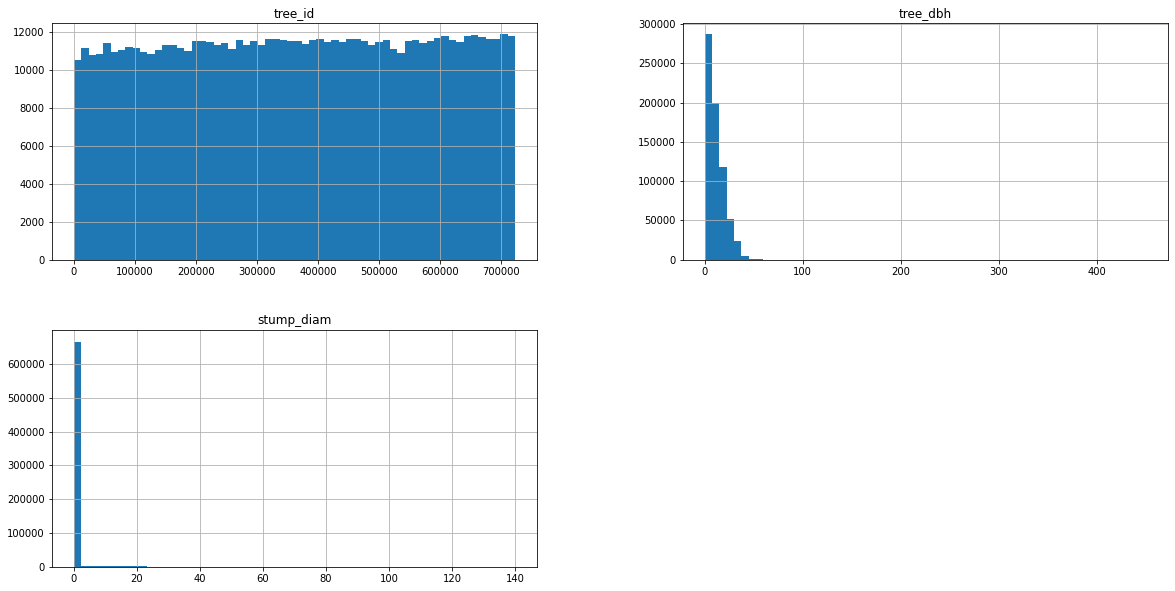

In [26]:
tree_census_subset.hist(bins=60, figsize =(20,10) )

Let's eyeball the histogram and remove all points that aren't visible on the histogram. Let's see how the data looks for the 'outliers'.

In [30]:
big_trees = tree_census_subset[tree_census_subset['tree_dbh'] > 50]
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3738,199546,51,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
10083,215075,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
677954,166796,54,0,OnCurb,Alive,Good,Acer saccharinum,None,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
679894,169501,51,0,OnCurb,Alive,Good,Quercus alba,None,NoDamage,BranchLights,No,No,No,No,No,No,Yes,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


<AxesSubplot:xlabel='tree_id', ylabel='tree_dbh'>

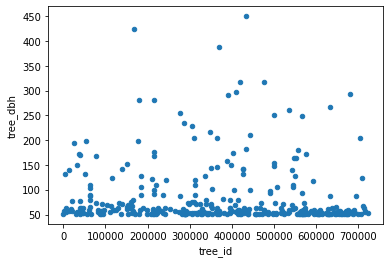

In [32]:
big_trees[['tree_id', 'tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh')

In [ ]:
Let's repeat this excecise for tree stump

In [35]:
tree_stump = tree_census_subset[tree_census_subset['stump_diam'] > 50]
tree_stump

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
6122,200925,0,52,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
6177,200924,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
6466,166008,0,72,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
7042,206818,0,100,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
9872,192215,0,53,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645994,135904,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646336,151125,0,55,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
649174,154188,0,65,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
652690,154181,0,60,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


<AxesSubplot:xlabel='tree_id', ylabel='stump_diam'>

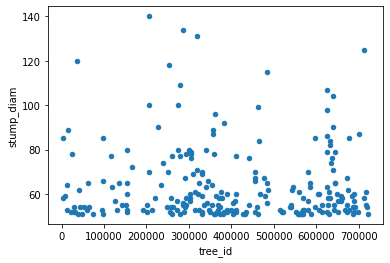

In [36]:
tree_stump[['tree_id', 'stump_diam']].plot(kind='scatter', x='tree_id', y='stump_diam')

### Further Exploration

Now comes the fun part, take your time to explore the data to better understand what you are looking at. Look for 'eyeball' rough estimatations of distributions, correlations or other outliers.

Below is an example of things to look at:

Looking at the most common trees

<AxesSubplot:>

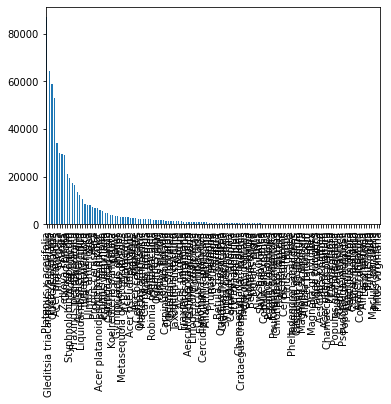

In [39]:
tree_census_subset['spc_latin'].value_counts().plot(kind='bar')

Assume you're unfamiliar with what the column 'steward', 'sidewalk', 'curb_loc' exactly entails by looking at the data. So you want to know all the possible values:

`df['ColumnName'].value_counts()`

In [44]:
tree_census_subset['steward'].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [45]:
tree_census_subset['sidewalk'].value_counts()

NoDamage    464978
Damage      187194
Name: sidewalk, dtype: int64

In [46]:
tree_census_subset['curb_loc'].value_counts()

OnCurb            656896
OffsetFromCurb     26892
Name: curb_loc, dtype: int64

In [49]:
stumps = tree_census_subset[tree_census_subset['status']=='Stump']
stumps

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


When there are multiple columns with the same assigned responses. It's good to visually see the value counts of the responses. 

In [56]:
tree_problems = tree_census_subset[['root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other']]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [57]:
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


### CONCLUSION

This is a good example a data exploration prior to data cleaning. The scatterplots and bar charts were necessary to be more familiar with the data prior to more in-depth data cleaning. Sometimes data exploration is key in preventing yourself from wrong formatting columns and accurately interpetting relationships between features.

## EXAMPLE 2 - Rollercoasters

### Data Understanding
- `df.shape`

- `df.head()`

- `df.tail()`

- `df.dtypes`

- `df.describe()`
- `df.columns`


In [86]:
df = pd.read_csv("coaster_db.csv")
data = df.copy() 
# 'data' will be used as a backup in case we make any revisions 
# to the database that can't be reversed.

We see that there are 56 columns (features) and 1087 rows of data:

In [84]:
df.shape

(1087, 56)

We can get a general idea of how the the table looks and establish what the values look like.

One thing to notice is that the column 'Speed' and 'Height' are string values instead of numerical values. This can be deemed undesirable for certain methods of Machine Learning so it's likely something that would have to be revised in preparation for advanced statistical methods.

In [63]:
df.head(3)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.574,-73.978,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.580,-81.570,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


There are a lot of columns, so let's see what kind of features the data has:

In [68]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

Now that we know the feature names. Let's see what kind of data it is (catagorical or numerical), this will give us a rough estimate on the type of data visualizaton/manipulation we will be able to do.

In [80]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

We can immediately look at all the features with numerical values using the __describe__ tool. This is a good gauge to look at the distribution of data and look at the min/max value hypothesize if there are outliers.

In [70]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


### Data Preparation
- Drop irrelevant columsn and rows
- Identify duplicate columns
- Rename Columns
- Feature Creation

Based on looking at the data values, data columns and data distrubution. Let's remove any data we subjectively think aren't valuable.

#### DROP COLUMNS

There's two ways to elminate columns: filter the current dataframe by only including desired columns or filter the current dataframe by dropping undesired columns (there's a subtle difference).

For the 'dropping' method - here's the code:

In [89]:
#axis = 1 let's the code know we are dropping by column and not by row.

#df.drop(['Opening date'], axis=1) #<---drops one column
#df.drop(['Theme'], axis=1) #<---drops multiple columns

We're going to use the 'including' method:

In [90]:
df = df[['coaster_name','Location','Status', 'Manufacturer','year_introduced',
         'latitude', 'longitude', 'Type_Main','opening_date_clean','speed_mph',
        'height_ft','Inversions_clean', 'Gforce_clean']]

The original shape was (1087, 56) and the new shape is below:

In [92]:
df.shape

(1087, 13)

#### MODIFY DATA TYPE

We saw in `info()` that __opening_date_clean__ was an object time. We should convert that to a datetime object:

In [98]:
print(df['opening_date_clean'].dtype)

df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

print(df['opening_date_clean'].dtype)

object
datetime64[ns]


We don't want to do it in this circumstance, but below are two methods of converting __year_introduced__ to a numercial value.

In [109]:
#pd.to_numeric(df['year_introduced'])
#int(df['year_introduced']) #<--sometimes will get errors due to nan values

#### RENAME COLUMNS

Not always necessary to rename columns. But each organizaton could have a preference in column nomeclature to keep all cleaned datasets unified. 

In [111]:
df = df.rename(columns={'coaster_name': 'Coaster_Name',
                   'year_introduced': 'Year_Introduced',
                  'opening_date_clean': 'Opening_Date_Clean',
                  'speed_mph': 'Speed_MPH',
                  'height_ft': 'Height_Ft',
                  'Inversions_clean': 'Inversions_Clean',
                  'Gforce_clean': 'Gforce_Clean'})

df.head(3)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_Ft,Inversions_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.580,-81.570,Other,NaT,NaN,NaN,0,NaN


#### IDENTIFY MISSING VALUES
- `.isna().sum()`
- `.duplicated()`
- `.query()`

In [112]:
df.isna().sum()

Coaster_Name            0
Location                0
Status                213
Manufacturer           59
Year_Introduced         0
latitude              275
longitude             275
Type_Main               0
Opening_Date_Clean    250
Speed_MPH             150
Height_Ft             916
Inversions_Clean        0
Gforce_Clean          725
dtype: int64

#### IDENTIFY DUPLICATED VALUES
`df.duplicated()`

The below line of code demonstrates that there are no duplicates in the data as a whole. But sometimes it's valuable to see if there are duplicate values on a row/feature level.

In [116]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_Ft,Inversions_Clean,Gforce_Clean


We can see below that certain coasters are the same but the difference is simply the year introduced.

In [118]:
df.loc[df.duplicated(subset=['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_Ft,Inversions_Clean,Gforce_Clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [122]:
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_Ft,Inversions_Clean,Gforce_Clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In this scenario, we're only concerned with unique values for each Coaster so we're going to drop psuedo-duplicates.

'~' is the symbol for 'not'

In [131]:
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date_Clean'])].reset_index(drop=True)
df.shape

(990, 13)

### Feature Understanding

-Plotting feature distributions

-histogram

-kde

-Boxplot

__NOTE__: This example will only be performed on one feature in this notebook. However, in reality this process will be repeated all 13 features.

We can use `value_counts()` to see how frequent unique values occur. The below line of code let's us know that 1999 introduced the most roller coasters.

In [135]:
df['Year_Introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

We will make a plot to show the top 10 years introduced.

NOTE:
    
Saving plot as 'ax' saves diagram as a matplotlib. This will allow us to add additional information to it.

Text(0, 0.5, 'Counts')

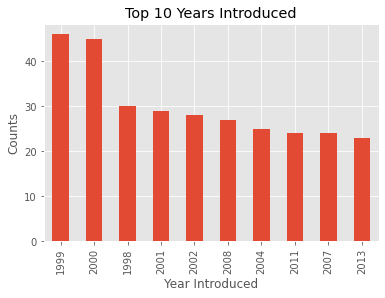

In [141]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Counts')

We're going to now look at Speed. But it's important to observe that it was not common to document speed on coasters built in 1800s/early 1900s which is why there will be some null values. This is an important example as to it is important to understand the dataset and read the explanation file.

In [144]:
df.head(3)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date_Clean,Speed_MPH,Height_Ft,Inversions_Clean,Gforce_Clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.580,-81.570,Other,NaT,NaN,NaN,0,NaN


It's easy to see that the most common speed is 50mph

Text(0.5, 0, 'Speed (mph)')

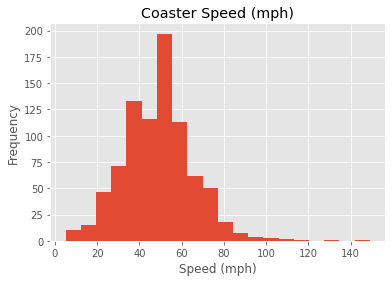

In [149]:
ax = df['Speed_MPH'].plot(kind='hist', bins=20, title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

An alternative plot is a density plot

Text(0.5, 0, 'Speed (mph)')

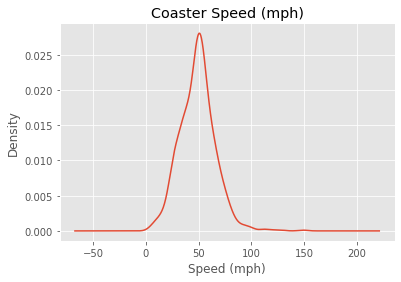

In [151]:
ax = df['Speed_MPH'].plot(kind='kde',title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

### Feature Relationships
- Scatterplot
- Heatmap
- Pairplot
- Group By

Rather than know the distribution of each feature, it's equally important to know the feature's correlations (or lack thereof).

Without formal Linear Regression, it is clear there is a linear relationship between Speed and Height:

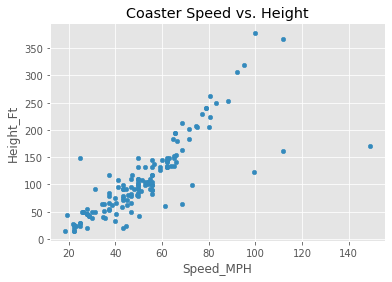

In [153]:
df.plot(kind='scatter', x='Speed_MPH', y='Height_Ft', title= 'Coaster Speed vs. Height')
plt.show()

Seaborn as different features than matplotlib. Such as adding complexity to the graphs by using hue as a 3rd plotting variable.

<AxesSubplot:xlabel='Speed_MPH', ylabel='Height_Ft'>

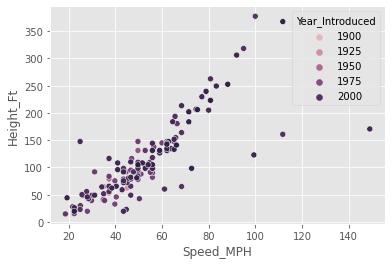

In [158]:
sns.scatterplot(x='Speed_MPH', y='Height_Ft', hue='Year_Introduced', data=df)


Pairplot is an amazing why to plot multiple variables along an x and y axis. It's one of my favorite tools.

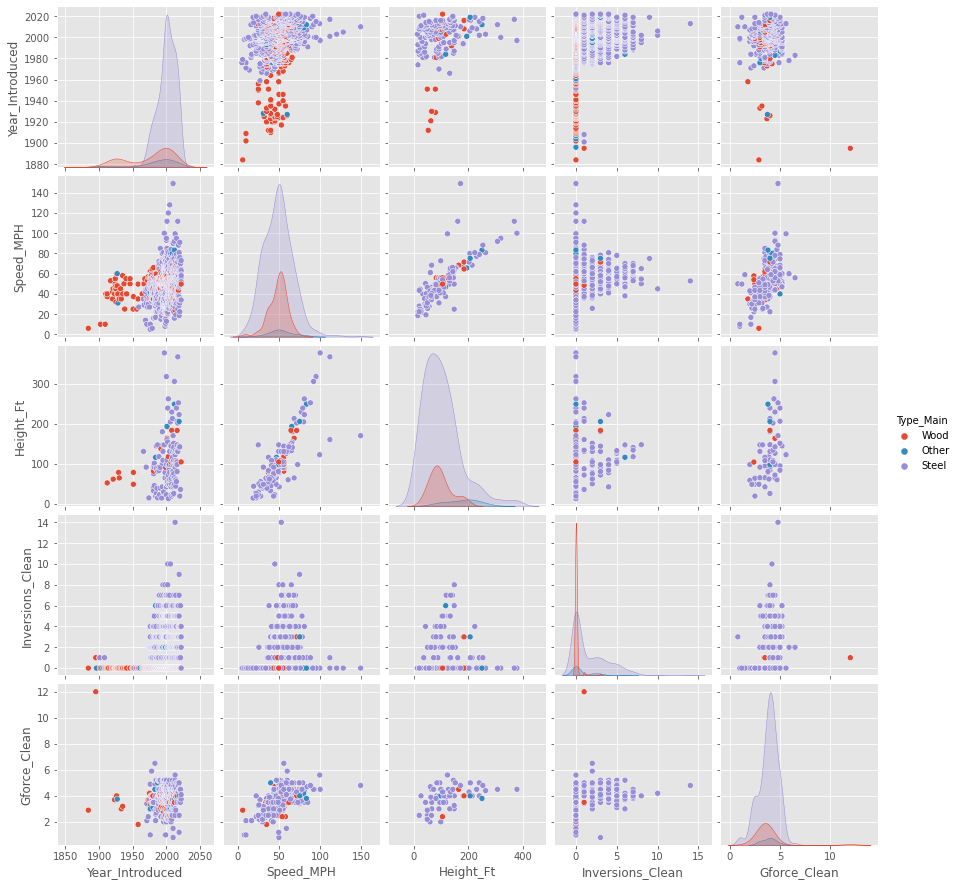

In [165]:
sns.pairplot(df, hue='Type_Main', vars=['Year_Introduced', 'Speed_MPH', 'Height_Ft', 'Inversions_Clean', 'Gforce_Clean'])

In [162]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date_Clean', 'Speed_MPH',
       'Height_Ft', 'Inversions_Clean', 'Gforce_Clean'],
      dtype='object')

Let's look at correlation between the values.

In [169]:
df_corr = df[['Year_Introduced','Speed_MPH', 'Height_Ft','Inversions_Clean','Gforce_Clean' ]].dropna().corr()

df_corr

,Year_Introduced,Speed_MPH,Height_Ft,Inversions_Clean,Gforce_Clean
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_MPH,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_Ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_Clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_Clean,0.160247,0.607383,0.466482,0.275991,1.000000


A heatmap is perfect for plotting the correlation.

<AxesSubplot:>

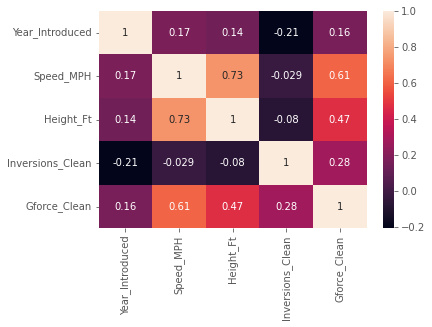

In [170]:
sns.heatmap(df_corr, annot=True)

### Ask a Question About the Data

Now that you know your data. It's a good time to brainstorm questions and see if your data can answer that question. If not, that's ok! Questions know the limitations of your current dataset and provide guidance on if it's worth collecting more data.

Below is an example of a question that may come up:

#### What are the locations with the fastest roller coasters (min of 10)?

The below plot can answer that question!

Text(0.5, 0, 'Average Coaster Speed')

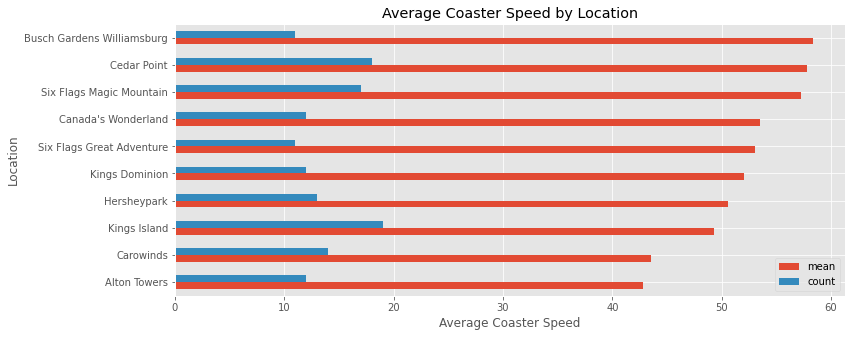

In [181]:
ax = df.query('Location != "Other"').groupby('Location')['Speed_MPH'].agg(['mean','count']).query('count >= 10').sort_values('mean').plot(kind='barh', figsize=(12,5), title='Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')

### CONCLUSION

The first example was a scenario of a prelminary data exploration prior to data cleaning; this scenario is when data exploration comes _after/in-parallel_ to data cleaning.

This data is perfect for advanced data analysis; we've shown scatterplots, density plots, histograms, heatmaps, pairplots. That's even before Machine Learning and Deep Learning tools.

## EXAMPLE 3 - World Population

If you've reviewed and studied the first two examples, you're now a pro so we're going to limit the commentary in this excerise to eliminate redundancy.


In [191]:
df = pd.read_csv(r"world_population.csv") #Enter your path
df.head(3)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56


In [190]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [193]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [194]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

This appears to be a a small dataset so it is recommended to be conservative with deleting rows with null values.

In [196]:
df.shape

(234, 17)

`df.nunique()` is diffrent than `df.unique()`in the sense that the latter is used to display all the unique values for a specific column. The former will give you a count of all the unique values. 

It makes sense that population has a substantial quantity of unique values since it's expected to be a continous variable and Continent makes sense to have a small quantity of unique values.

In [201]:
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

`df.sort_values(by='Column_name')` - sorts values.

In [204]:
df.sort_values(by='2022 Population', ascending=False).head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96


In [207]:
df_corr = df.corr()
df_corr

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.00,-0.36,-0.36,-0.35,-0.35,-0.34,-0.33,-0.33,-0.34,-0.38,0.13,-0.22,-0.36
2022 Population,-0.36,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.97,0.45,-0.03,-0.02,1.00
2020 Population,-0.36,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.45,-0.03,-0.03,1.00
2015 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,-0.35,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,-0.34,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,-0.33,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.52,-0.03,-0.07,0.99
1980 Population,-0.33,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.53,-0.03,-0.08,0.99
1970 Population,-0.34,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),-0.38,0.45,0.45,0.46,0.46,0.47,0.52,0.53,0.51,1.00,-0.06,-0.01,0.45


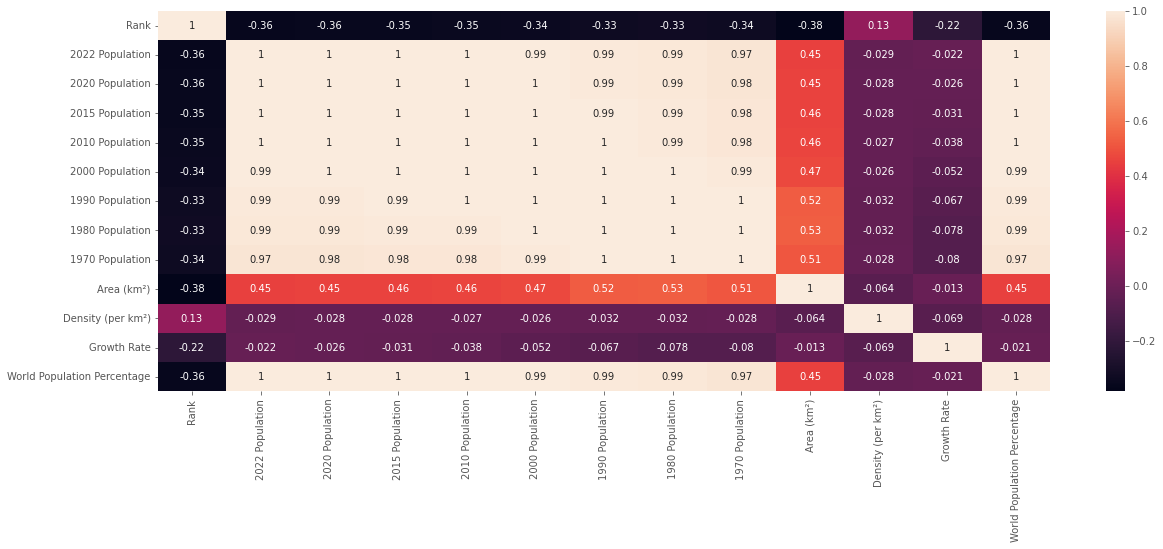

In [213]:
sns.heatmap(df_corr, annot=True)
plt.rcParams['figure.figsize'] = (20, 20)
plt.show()

Are there certain populations growing at a significantly faster rate?

In [215]:
df.groupby('Continent').mean()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Africa,92.16,25455879.68,23871435.26,21419703.57,18898197.31,14598365.95,11376964.52,8586031.98,6567175.27,537879.30,126.41,1.02,0.31
Asia,77.56,96327387.31,94955134.37,89165003.64,89087770.00,80580835.11,48639995.33,40278333.33,43839877.83,642762.82,1025.02,1.01,1.18
Europe,124.50,15055371.82,14915843.92,15027454.12,14712278.68,14817685.71,14785203.94,14200004.52,13118479.82,460208.22,663.32,1.00,0.19
North America,160.93,15007403.40,14855914.82,14259596.25,13568016.28,12151739.60,10531660.62,9207334.03,7885865.15,606104.45,272.49,1.00,0.19
Oceania,188.52,2046386.32,1910148.96,1756664.48,1613163.65,1357512.09,1162774.87,996532.17,846968.26,370220.91,132.54,1.01,0.02
South America,97.57,31201186.29,30823574.50,29509599.71,26789395.54,25015888.69,21224743.93,17270643.29,13781939.71,1301302.85,20.97,1.01,0.39


`df['Column_Name'].str.contains('String_value')`

In [216]:
df[df['Continent'].str.contains('Oceania')]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
11,55,AUS,Australia,Canberra,Oceania,26177413.00,25670051.00,23820236.00,22019168.00,19017963.00,17048003.00,14706322.00,12595034.00,7692024.00,3.40,1.01,0.33
44,223,COK,Cook Islands,Avarua,Oceania,17011.00,17029.00,17695.00,17212.00,15897.00,17123.00,17651.00,20470.00,236.00,72.08,1.00,0.00
66,162,FJI,Fiji,Suva,Oceania,929766.00,920422.00,917200.00,905169.00,832509.00,780430.00,644582.00,527634.00,18272.00,50.88,1.01,0.01
70,183,PYF,French Polynesia,Papeete,Oceania,306279.00,301920.00,291787.00,283788.00,250927.00,211089.00,163591.00,117891.00,4167.00,73.50,1.01,0.00
81,191,GUM,Guam,Hagåtña,Oceania,171774.00,169231.00,167978.00,164905.00,160188.00,138263.00,110286.00,88300.00,549.00,312.89,1.01,0.00
107,192,KIR,Kiribati,Tarawa,Oceania,131232.00,126463.00,116707.00,107995.00,88826.00,75124.00,60813.00,57437.00,811.00,161.81,1.02,0.00
126,215,MHL,Marshall Islands,Majuro,Oceania,41569.00,43413.00,49410.00,53416.00,54224.00,46047.00,31988.00,23969.00,181.00,229.66,0.99,0.00
132,194,FSM,Micronesia,Palikir,Oceania,114164.00,112106.00,109462.00,107588.00,111709.00,98603.00,76299.00,58989.00,702.00,162.63,1.01,0.00
142,225,NRU,Nauru,Yaren,Oceania,12668.00,12315.00,11185.00,10241.00,10377.00,9598.00,7635.00,6663.00,21.00,603.24,1.01,0.00


In [228]:
df2 = df.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].mean().sort_values(by='2022 Population', ascending = False)
df2

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,43839877.83,40278333.33,48639995.33,80580835.11,89087770.00,89165003.64,94955134.37,96327387.31
South America,13781939.71,17270643.29,21224743.93,25015888.69,26789395.54,29509599.71,30823574.50,31201186.29
Africa,6567175.27,8586031.98,11376964.52,14598365.95,18898197.31,21419703.57,23871435.26,25455879.68
Europe,13118479.82,14200004.52,14785203.94,14817685.71,14712278.68,15027454.12,14915843.92,15055371.82
North America,7885865.15,9207334.03,10531660.62,12151739.60,13568016.28,14259596.25,14855914.82,15007403.40
Oceania,846968.26,996532.17,1162774.87,1357512.09,1613163.65,1756664.48,1910148.96,2046386.32


<AxesSubplot:xlabel='Continent'>

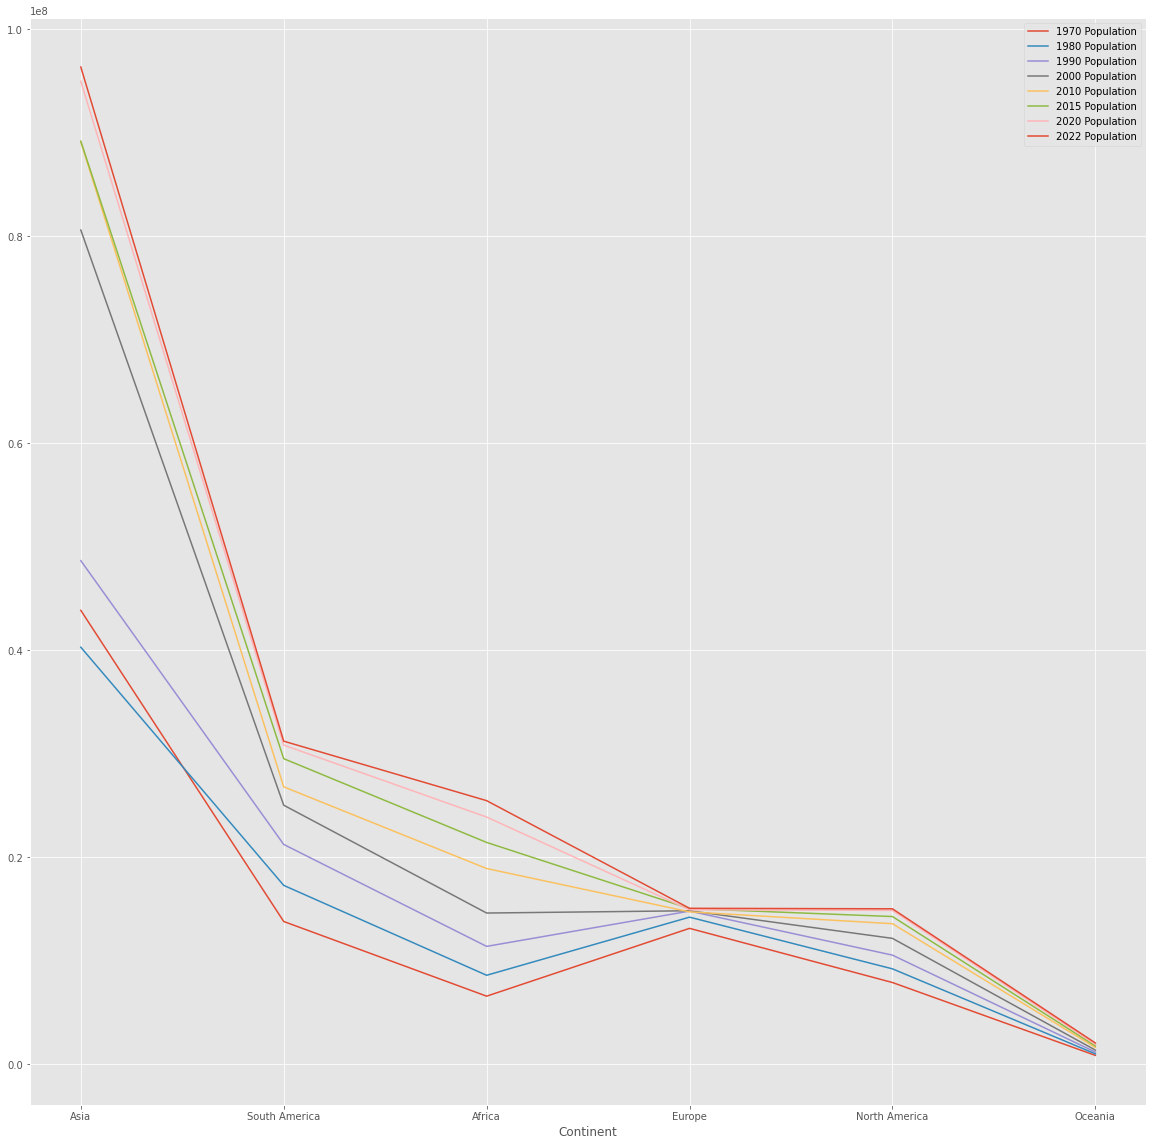

In [229]:
df2.plot()

In [230]:
df3 = df2.transpose()
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,43839877.83,13781939.71,6567175.27,13118479.82,7885865.15,846968.26
1980 Population,40278333.33,17270643.29,8586031.98,14200004.52,9207334.03,996532.17
1990 Population,48639995.33,21224743.93,11376964.52,14785203.94,10531660.62,1162774.87
2000 Population,80580835.11,25015888.69,14598365.95,14817685.71,12151739.60,1357512.09
2010 Population,89087770.00,26789395.54,18898197.31,14712278.68,13568016.28,1613163.65
2015 Population,89165003.64,29509599.71,21419703.57,15027454.12,14259596.25,1756664.48
2020 Population,94955134.37,30823574.50,23871435.26,14915843.92,14855914.82,1910148.96
2022 Population,96327387.31,31201186.29,25455879.68,15055371.82,15007403.40,2046386.32


<AxesSubplot:>

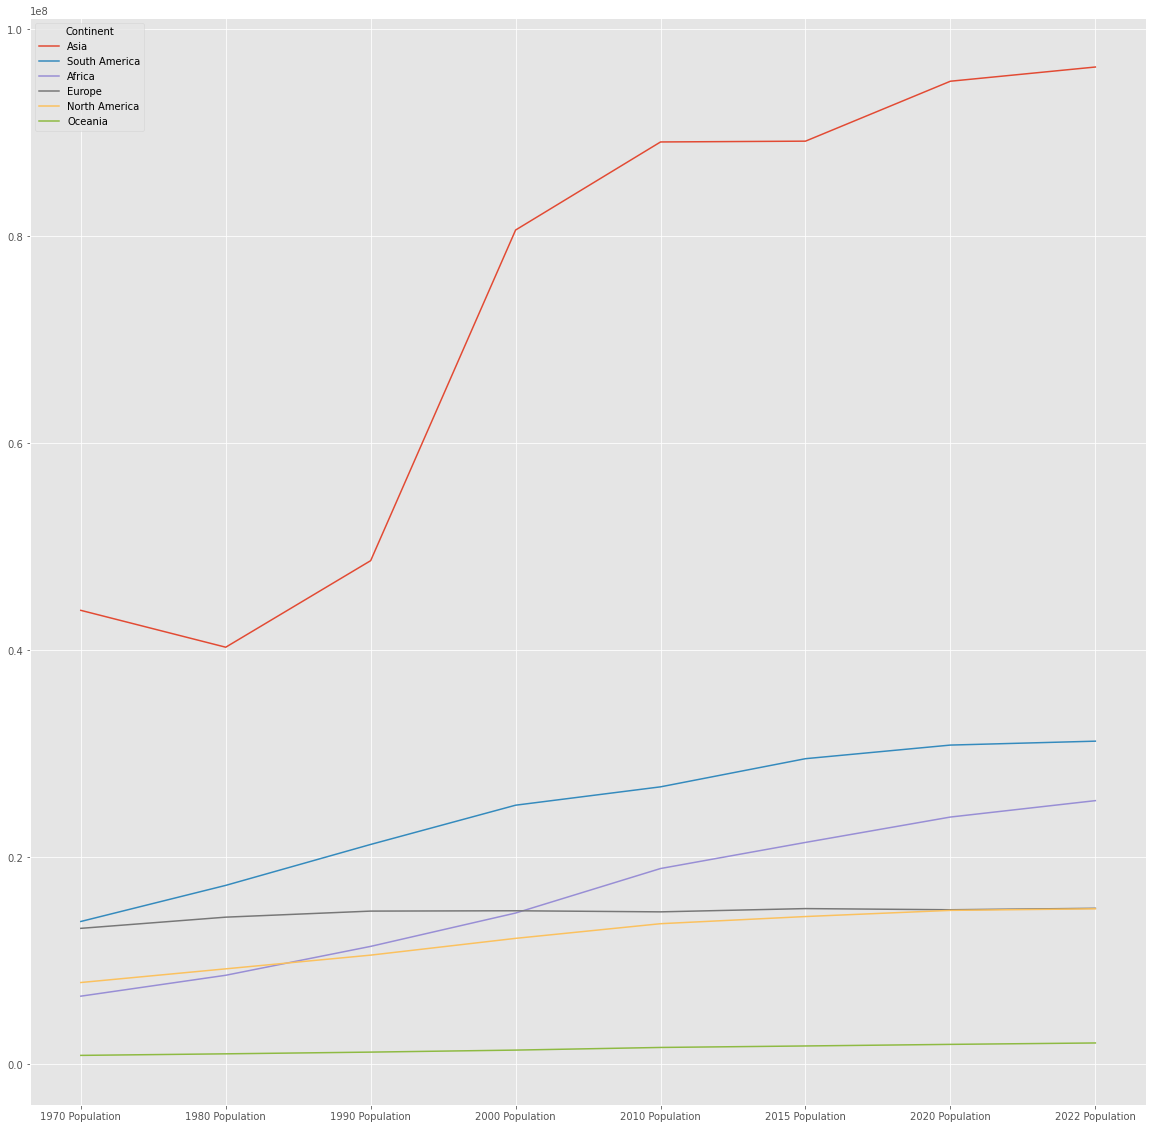

In [231]:
df3.plot()

<AxesSubplot:>

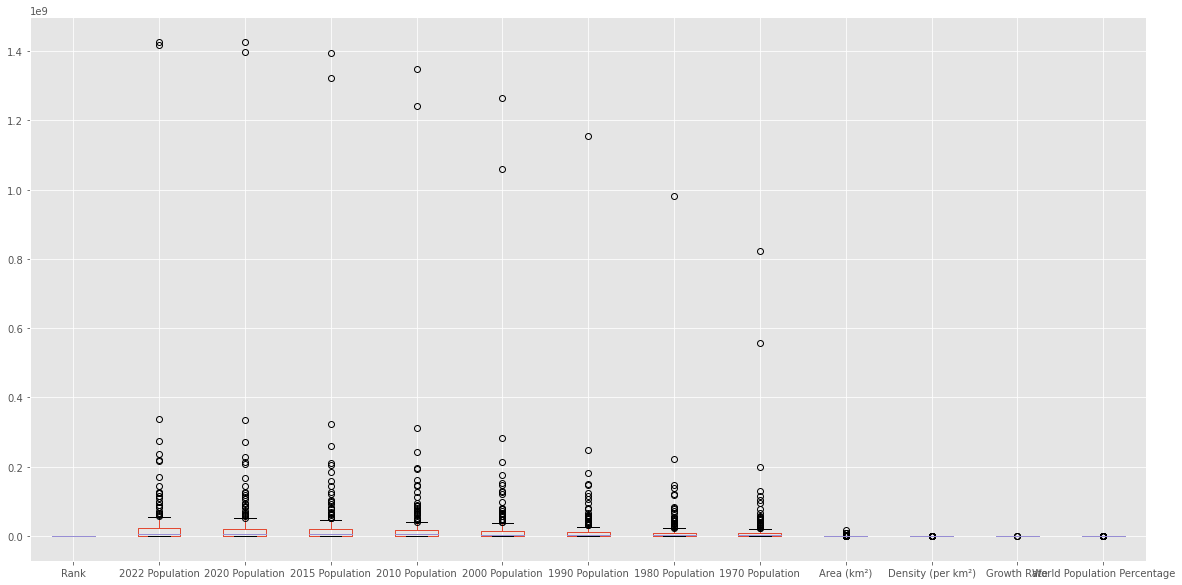

In [232]:
df.boxplot(figsize=(20,10))

<AxesSubplot:>

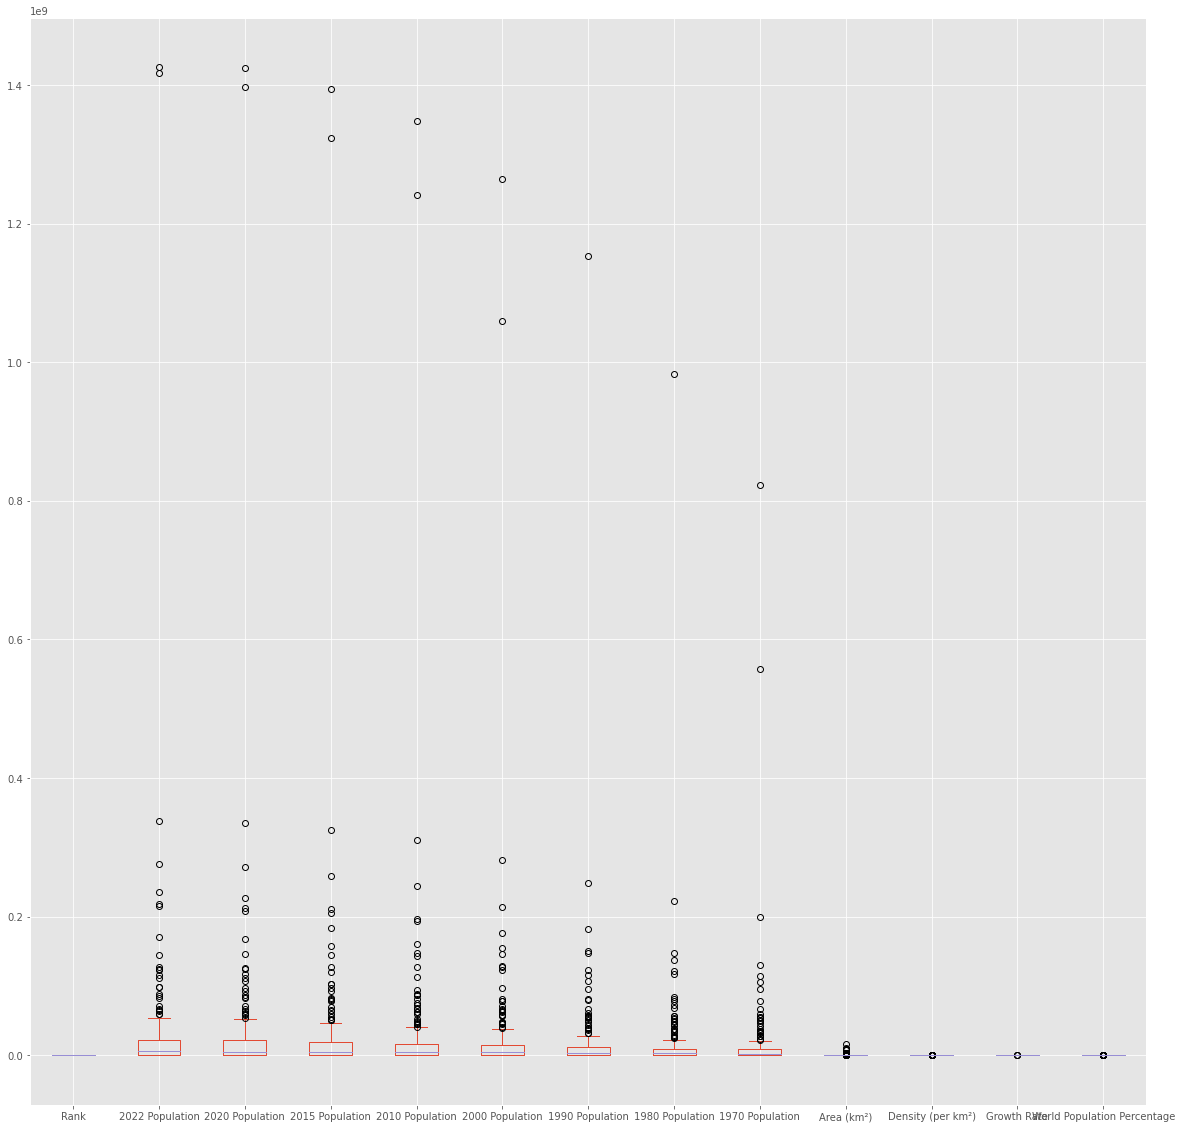

In [234]:
df.plot(kind='box') #alternative method for boxplot

`df.select_dtypes(include='datatype')` - This allows you to filter an entire dataset to include only the features that have your desired datatype.

In [236]:
df.select_dtypes(include='number')

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,11572.00,11655.00,12182.00,13142.00,14723.00,13454.00,11315.00,9377.00,142.00,81.49,1.00,0.00
230,172,575986.00,556048.00,491824.00,413296.00,270375.00,178529.00,116775.00,76371.00,266000.00,2.17,1.02,0.01
231,46,33696614.00,32284046.00,28516545.00,24743946.00,18628700.00,13375121.00,9204938.00,6843607.00,527968.00,63.82,1.02,0.42
232,63,20017675.00,18927715.00,NaN,13792086.00,9891136.00,7686401.00,5720438.00,4281671.00,752612.00,26.60,1.03,0.25


In [237]:
df.select_dtypes(include='object')

,CCA3,Country,Capital,Continent
0,AFG,Afghanistan,Kabul,Asia
1,ALB,Albania,Tirana,Europe
2,DZA,Algeria,Algiers,Africa
3,ASM,American Samoa,Pago Pago,Oceania
4,AND,Andorra,Andorra la Vella,Europe
...,...,...,...,...
229,WLF,Wallis and Futuna,Mata-Utu,Oceania
230,ESH,Western Sahara,El Aaiún,Africa
231,YEM,Yemen,Sanaa,Asia
232,ZMB,Zambia,Lusaka,Africa


In [238]:
df.select_dtypes(include='float')

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
229,11572.00,11655.00,12182.00,13142.00,14723.00,13454.00,11315.00,9377.00,142.00,81.49,1.00,0.00
230,575986.00,556048.00,491824.00,413296.00,270375.00,178529.00,116775.00,76371.00,266000.00,2.17,1.02,0.01
231,33696614.00,32284046.00,28516545.00,24743946.00,18628700.00,13375121.00,9204938.00,6843607.00,527968.00,63.82,1.02,0.42
232,20017675.00,18927715.00,NaN,13792086.00,9891136.00,7686401.00,5720438.00,4281671.00,752612.00,26.60,1.03,0.25


### CONCLUSION

Now that you've explored that data and are confident that the table contains all the information you need. The next step is to clean the data by fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.